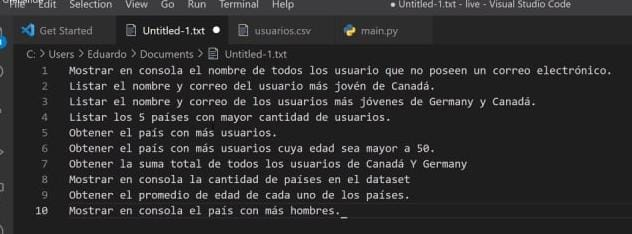

In [2]:
# importaciones xd
import numpy as np
import pandas as pd


## Importando el Dataset

In [3]:
url = 'https://raw.githubusercontent.com/codigofacilito/pandas-python/master/users.csv'
df = pd.read_csv(url, index_col=0)

## Antes de hacer los ejercicios, revisamos algunas caracteristicas del dataset

In [ ]:
df.head()

,nombre,edad,genero,pais,email
0,Mr Jerome Thomas,73,male,United States,jerome.thomas@example.com
1,Mr Gary Berry,70,male,United Kingdom,gary.berry@example.com
2,Mr Noham Dubois,40,male,France,noham.dubois@example.com
3,Mrs Naja Johansen,63,female,Denmark,naja.johansen@example.com
4,Mr Damien Marchand,61,male,France,damien.marchand@example.com


In [ ]:
df.count()

nombre    200
edad      200
genero    200
pais      200
email     200
dtype: int64

In [ ]:
df.describe(include='all')

,nombre,edad,genero,pais,email
count,200,200.000000,200,200,200
unique,197,NaN,2,17,197
top,Mr Gary Berry,NaN,female,Ireland,gary.berry@example.com
freq,4,NaN,106,16,4
mean,NaN,48.020000,NaN,NaN,NaN
std,NaN,16.197884,NaN,NaN,NaN
min,NaN,22.000000,NaN,NaN,NaN
25%,NaN,32.750000,NaN,NaN,NaN
50%,NaN,49.000000,NaN,NaN,NaN
75%,NaN,62.000000,NaN,NaN,NaN


In [ ]:
df[pd.isnull(df) == True].count()

nombre    0
edad      0
genero    0
pais      0
email     0
dtype: int64

*Conclusiones*

* Tenemos informacion de nombre, edad, genero, pais & email
* Hay 200 registros sin valores NaN o null
* Hay 197 valores unicos en nombres, otros 4 se repiten
* El nombre que mas se repite es Mr Gary Berry
* Hay 2 valores en genero y hay mas females
* Hay 17 paises y mas de ireland

## Ejercicios

###  1. Mostrar en consola el nombre de todos los usuarios que no poseen un correo electronico

In [5]:
df[pd.isnull(df.email) == True].nombre
## No hay nombres sin email
# otra forma
df[ df['email'].isnull() ]['nombre']

Series([], Name: nombre, dtype: object)

### 2. Listar el nombre y correo del usuario mas joven de Canada

In [6]:
df[df.pais == 'Canada'].min()[['nombre','email']].values

array(['Miss Julia Ambrose', 'anthony.wong@example.com'], dtype=object)

### 3. Listar el nombre y correo de los usuarios mas jovenes de Germany y Canada

In [23]:
#en este caso tengo suerte que los dos primeros sean germany y canada y no hayan mas edades minimas
df[df.pais.isin(['Germany','Canada'])].sort_values(by = 'edad')[['nombre','email']].head(2)

## Otras Soluciones
# Hacel filtro por separado y luego unir
canada = df[df['pais']=='Canada'].sort_values(by='edad')[['nombre','email']].head(1)
germany = df[df['pais']=='Germany'].sort_values(by='edad')[['nombre','email']].head(1)

canada.append(germany)

# Solucion con funcion y luego unir
def el_mas_joven (df, pais):
  edad_joven = df[df['pais'] == pais]['edad'].min()
  pais_edad = df[(df['pais'] == pais) & (df['edad'] == edad_joven)][['nombre','email']]
  return pais_edad


el_mas_joven(df, 'Canada').append(el_mas_joven(df, 'Germany'))

,nombre,email
184,Mr Philip Bélanger,philip.belanger@example.com
88,Mrs Hilda Epp,hilda.epp@example.com


### 4. Listar los 5 paises con mayor cantidad de usuarios

In [25]:
df.groupby('pais')['pais'].count().sort_values(ascending = False).head(5)

# Otra forma con values counts
df.value_counts(df['pais']).head(5)

df['country'].value_counts.head(5)

pais
Ireland           16
Denmark           16
United Kingdom    15
Norway            14
New Zealand       14
dtype: int64

### 5. Obtener el pais con mas usuarios

In [67]:
df.groupby('pais')['pais'].count().sort_values(ascending = False).head(1)

#Otra forma
df['pais'].value_counts().head(1)
df['pais'].value_counts().idxmax()

'Ireland'

### 6. Obtener el pais con mas usuarios cuya edad sea mayor a 50

In [65]:
df[df.edad > 50].groupby('pais')['pais'].count().sort_values(ascending = False).head(1)

# otra forma
df[df['edad']>50]['pais'].value_counts().idxmax()

'Iran'

### 7. Obtener la suma total de todos los usuarios de Canada y Germany

In [66]:
df[df.pais.isin(['Canada','Germany'])]['pais'].count()

21

### 8. Mostrar en la consola la cantidad de paises en el dataset

In [70]:
df.groupby('pais')['pais'].unique().count()

len(df.groupby('pais')['pais'].unique())

17

### 9. Obtener el promedio de edad de cada uno de los paises

In [73]:
df.groupby('pais')['edad'].mean().round(1)

# Otra forma
df.groupby('pais').agg({'edad':['mean']})

,edad
,mean
pais,
Australia,51.166667
Brazil,50.666667
Canada,38.583333
Denmark,48.812500
Finland,42.200000
France,48.900000
Germany,39.555556
Iran,54.230769


### 10. Mostrar en consola el pais con mas hombres

In [75]:
df[df.genero == 'male'].groupby('pais')['pais'].count().sort_values(ascending=False).head(1)

pais
Ireland    10
Name: pais, dtype: int64

### Extra: obtener los paises con mayor cantidad de usuarios

In [59]:
df['pais'].value_counts()[df['pais'].value_counts()== df['pais'].value_counts().max()]

Ireland    16
Denmark    16
Name: pais, dtype: int64